# Trajectory inference on synthetic hematopoiesis data

Data was generated using the notebook : `early_hematopoiesis_unreachable_pEr.ipynb`

In [1]:
import pandas as pd
import stream as st
st.__version__

/opt/conda/lib/python3.7/site-packages/anndata/core/anndata.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/opt/conda/lib/python3.7/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


'1.0'

In [2]:
st.set_figure_params(dpi=80,style='white',figsize=[5.4,4.8],
                     rc={'image.cmap': 'viridis'})

In [3]:
%ls ../synthetic_data/

_tests/
branching_synthetic_core_regulation1_2022-04-11_14h33m15.tsv
branching_synthetic_core_regulation2_2022-04-11_14h57m51.tsv
metadata_core_regulation1_2022-04-11_14h33m15.tsv
metadata_core_regulation2_2022-04-11_14h57m51.tsv


#### Read in data

In [4]:
_in_file = '../synthetic_data/branching_synthetic_core_regulation2_2022-04-11_14h57m51.tsv'

adata = st.read(file_name=_in_file, workdir='./stream_branching')
df = pd.read_csv(_in_file, sep="\t", index_col=0, header=0)
df.head(10)

Saving results in: ./stream_branching


,common_obs0,common_obs1,common_obs2,common_obs3,common_obs4,common_obs5,common_obs6,common_obs7,common_obs8,common_obs9,...,attractor_fixed_point_2_obs5190,attractor_fixed_point_2_obs5191,attractor_fixed_point_2_obs5192,attractor_fixed_point_2_obs5193,attractor_fixed_point_2_obs5194,attractor_fixed_point_2_obs5195,attractor_fixed_point_2_obs5196,attractor_fixed_point_2_obs5197,attractor_fixed_point_2_obs5198,attractor_fixed_point_2_obs5199
G1,3.892874,1.248786,3.057174,0.836229,1.937875,4.492096,1.563765,3.994645,1.160276,5.187002,...,3.361783,3.819610,0.187968,3.452514,2.208439,3.779789,2.820680,2.441832,1.180721,0.139982
G2,2.827419,0.635362,4.433269,3.739484,0.197981,4.238321,2.607564,4.049231,1.823819,2.416939,...,0.000000,4.397667,3.695006,3.481371,3.139636,3.062335,2.146257,0.000000,1.692281,4.877957
G3,1.273664,0.000000,2.263485,3.175067,2.125259,0.552207,2.010461,1.636116,4.351696,0.087117,...,2.468511,4.142084,3.662187,2.173467,3.579890,2.136430,3.515511,2.614078,3.201539,3.098419
G4,3.724108,2.481673,2.307164,3.427367,4.728801,1.657739,5.357338,2.450891,1.894859,3.808074,...,10.338632,10.126109,7.347374,9.059547,8.592277,7.377961,7.815222,9.071489,9.554408,9.847821
G5,1.328451,2.954907,2.574745,2.953074,2.002604,2.864173,1.175434,2.706111,2.098331,3.416935,...,2.974968,4.176402,2.552022,3.166617,2.168680,4.885806,2.312026,2.475755,0.000000,2.996685
G6,3.069076,3.526111,3.080573,2.725792,1.096830,1.458825,2.551404,2.389929,1.438519,3.180785,...,0.000000,7.023591,7.620639,6.824633,9.401892,5.394280,8.523683,9.716912,7.274258,7.375188
G7,1.344202,3.858446,0.000000,0.711286,1.468082,5.016031,0.000000,0.098573,0.193779,1.658895,...,3.216266,3.449706,4.628220,2.589882,2.686677,3.212418,3.125129,3.018578,0.000000,1.340464
G8,2.815861,2.953641,0.599650,2.666098,2.691713,3.646377,1.833478,0.426255,0.753735,2.557053,...,1.135352,1.220199,3.627392,2.074299,0.055044,1.721197,3.742085,1.814842,3.633616,1.286037
G9,1.945071,1.037248,2.027147,3.068041,3.578462,5.758204,4.401871,1.380926,3.082050,2.096344,...,3.446995,1.836838,2.532696,3.316909,4.443055,2.324604,3.284321,3.877327,2.810238,0.000000
TF1,4.488231,1.003793,1.159408,2.554232,1.767284,2.364297,1.677254,2.297777,4.277515,2.651884,...,2.155027,1.403284,4.504902,3.657241,0.906871,2.787512,3.398877,1.865754,2.558884,3.065149


> **To load and use 10x Genomics single cell RNA-seq data processed with Cell Ranger:**   
(*The variable index can be reset by choosing a different column in `gene.tsv`*)
```python
adata=st.read(file_name='./filtered_gene_bc_matrices/matrix.mtx',
              file_feature='./filtered_gene_bc_matrices/genes.tsv',
              file_sample='./filtered_gene_bc_matrices/barcodes.tsv',
              file_format='mtx',workdir='./stream_result')    
adata.var.index = adata.var[1].values   
```

> **If the Anndata object is already created, to run STREAM, please simply specify work directory:**
```python
st.set_workdir(adata,'./stream_result')
```

In [5]:
adata

AnnData object with n_obs × n_vars = 5200 × 16 
    uns: 'workdir'

#### Read in metadata

In [6]:
st.add_metadata(
    adata, 
    file_name='../synthetic_data/metadata_core_regulation2_2022-04-11_14h57m51.tsv'
)
adata.obs.head()

,label,label_color
common_obs0,common,#65471A
common_obs1,common,#65471A
common_obs2,common,#65471A
common_obs3,common,#65471A
common_obs4,common,#65471A


In [7]:
adata.obs.label.value_counts()

common                     2000
branch_fixed_point_1       1200
branch_fixed_point_2        800
split                       400
attractor_fixed_point_2     400
attractor_fixed_point_1     400
Name: label, dtype: int64

#### Calculate QC

In [8]:
st.cal_qc(adata,assay='rna')

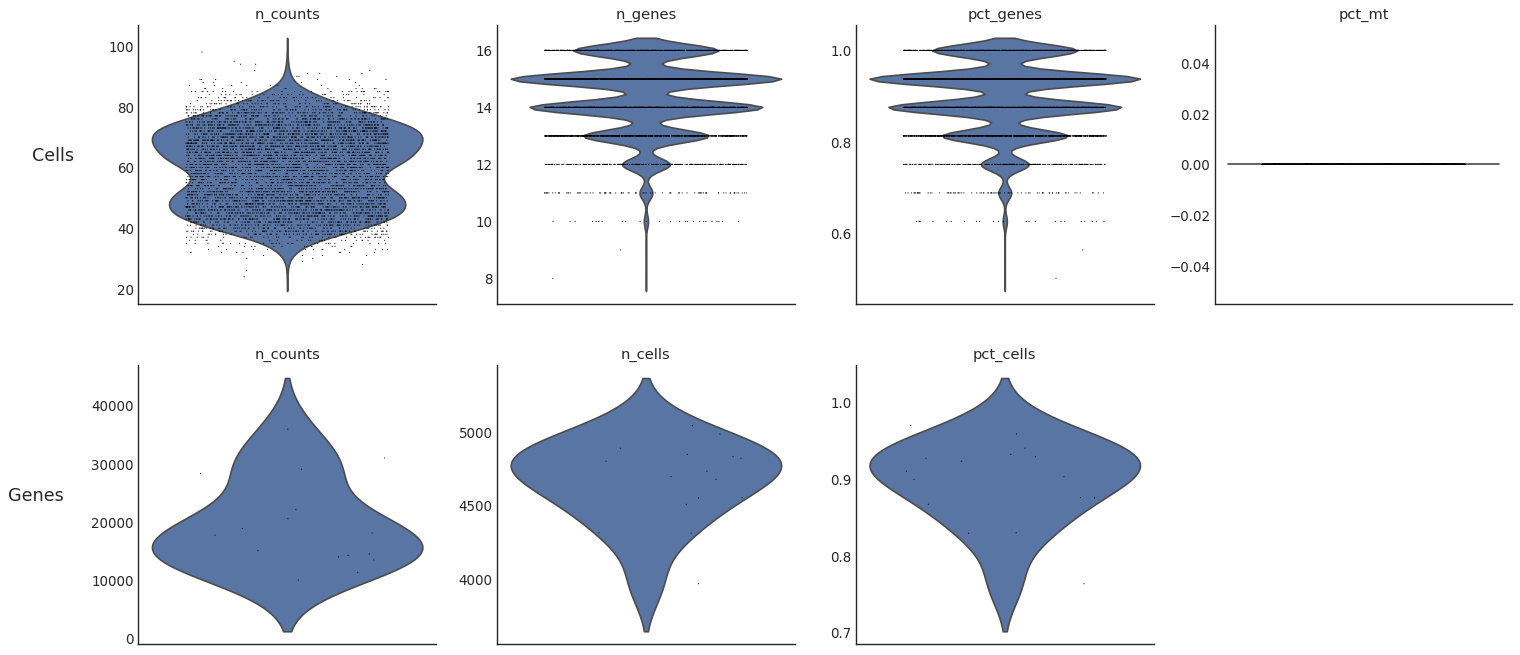

In [9]:
st.plot_qc(adata,jitter=0.3,)

In [10]:
st.filter_cells(adata,min_n_features= 3)
st.filter_features(adata,min_n_cells = 300)

filter cells based on min_n_features
after filtering out low-quality cells: 
5200 cells, 16 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
5200 cells, 16 genes


Commented out because our simulated data is already lib_size normalised and log2 transformed
```python
###Normalize gene expression based on library size  
st.normalize(adata,method='lib_size')
###Logarithmize gene expression 
st.log_transform(adata)
```

#### Feature selection

Please check if the blue curve fits the points well. If not, please adjust the parameter **'loess_frac'** (usually by lowering it) until the blue curve fits well. 

16 variable genes are selected


Index(['TF3', 'TF6', 'TF2', 'TF4', 'TF1', 'G6', 'G8', 'G3', 'G1', 'G2', 'G7',
       'TF5', 'G4', 'G5', 'TF7', 'G9'],
      dtype='object')

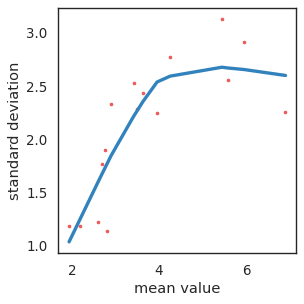

In [11]:
st.select_variable_genes(adata,loess_frac=0.8,n_genes=20)
adata.uns["var_genes"]

**Alternatively, user can also select top  principal components using all genes or variable genes:**
- use all genes   
`st.select_top_principal_components(adata,n_pc=15,first_pc=True)`
- use variable genes   
    - users need to first run `st.select_variable_genes(adata,loess_frac=0.01, n_genes=2000)`  
    - `st.select_top_principal_components(adata,feature='var_genes',n_pc=40,first_pc=True)`

#### Dimension reduction

In [12]:
st.dimension_reduction(
    adata,
    method='se',
    feature='var_genes',
    n_components=2,
    n_neighbors=15,
    n_jobs=12
)

feature var_genes is being used ...
12 cpus are being used ...


> **Alternatively, using top principal components as features:**
`st.dimension_reduction(adata,method='se',feature='top_pcs',n_neighbors=15, n_components=2)`

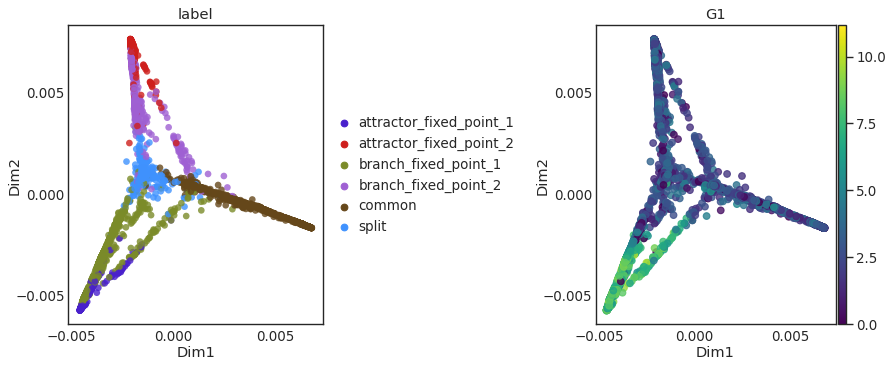

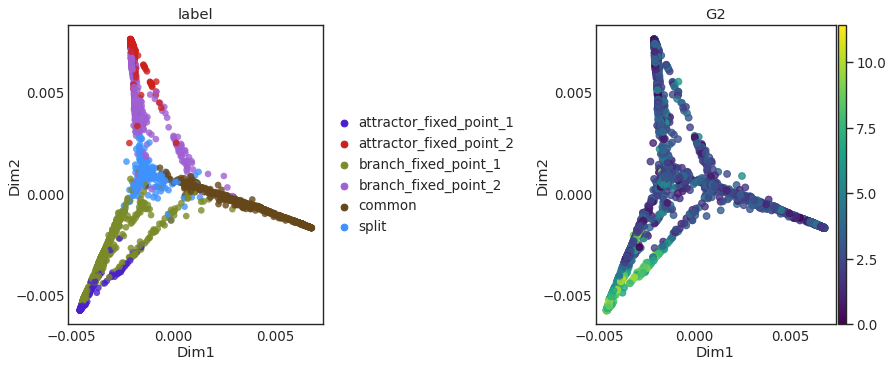

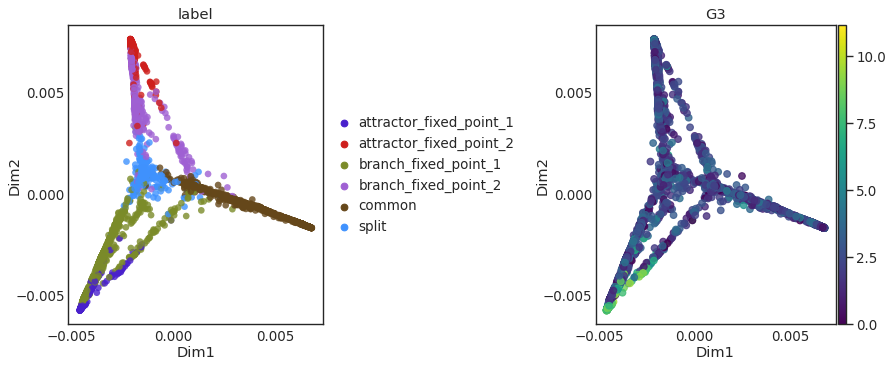

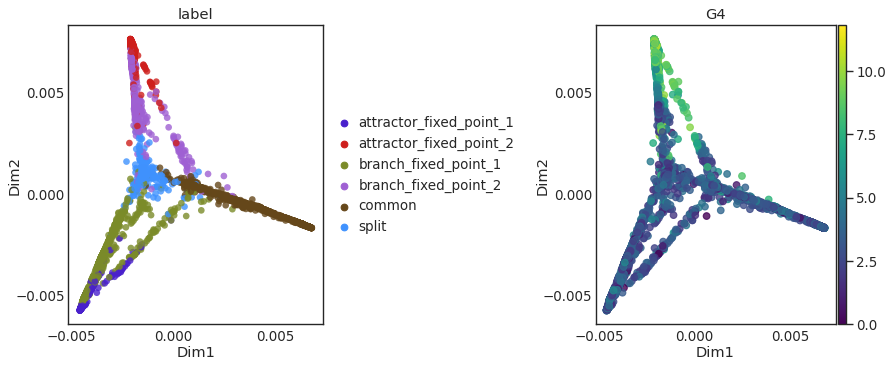

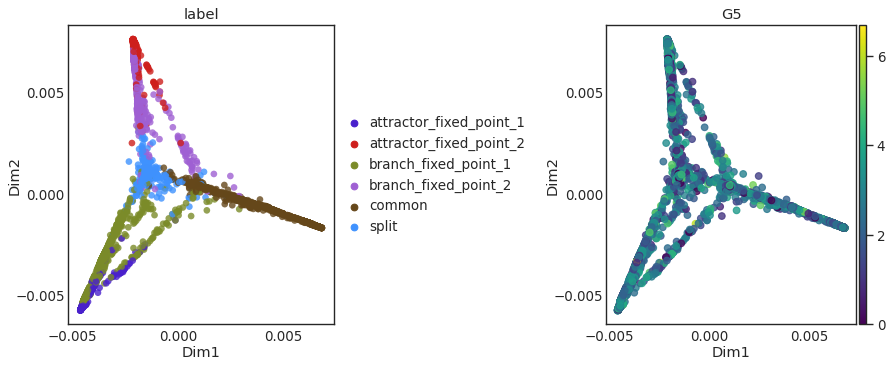

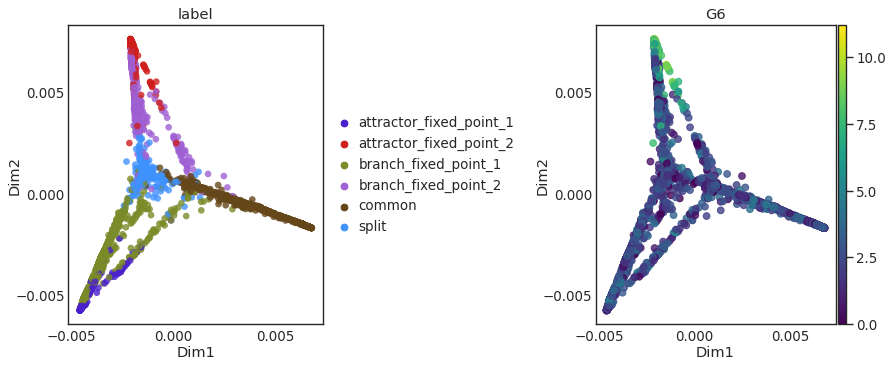

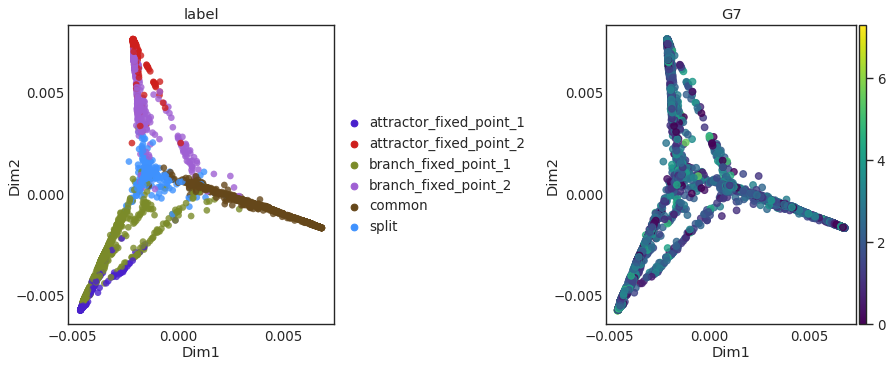

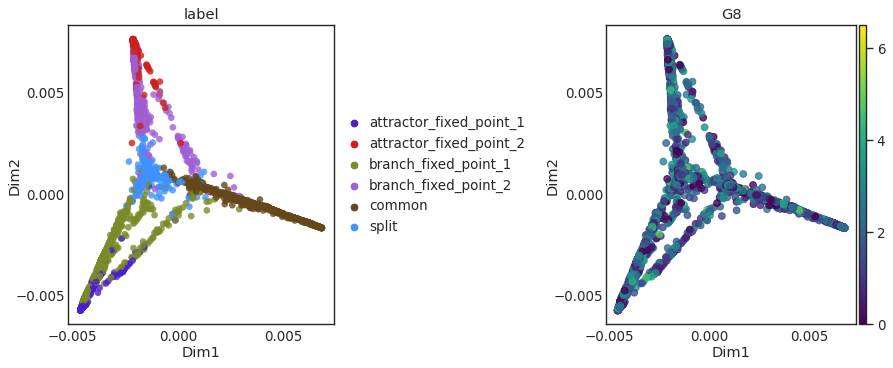

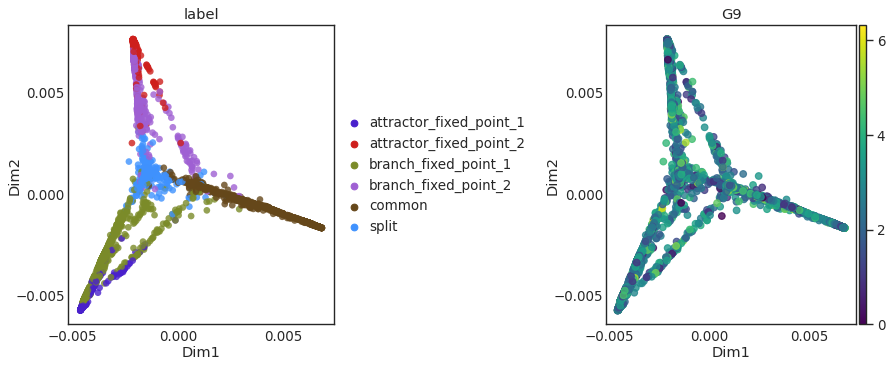

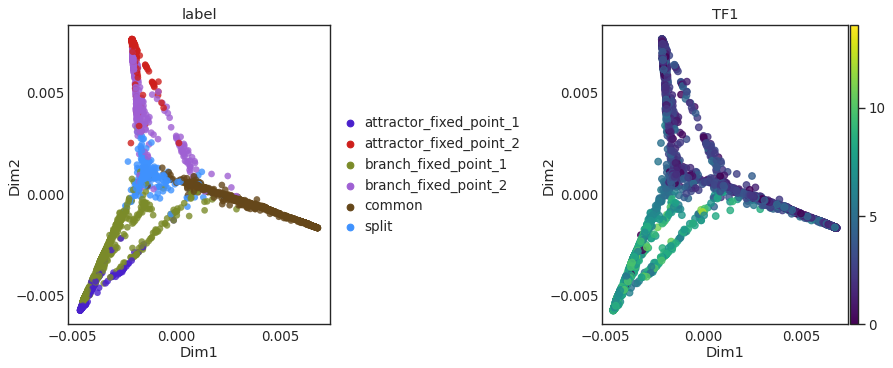

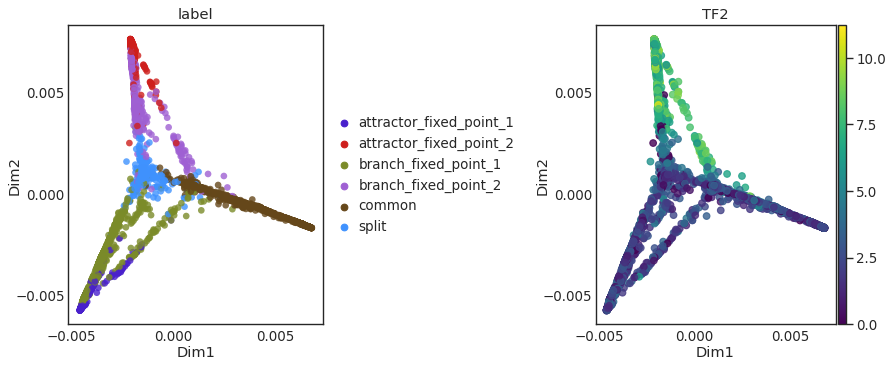

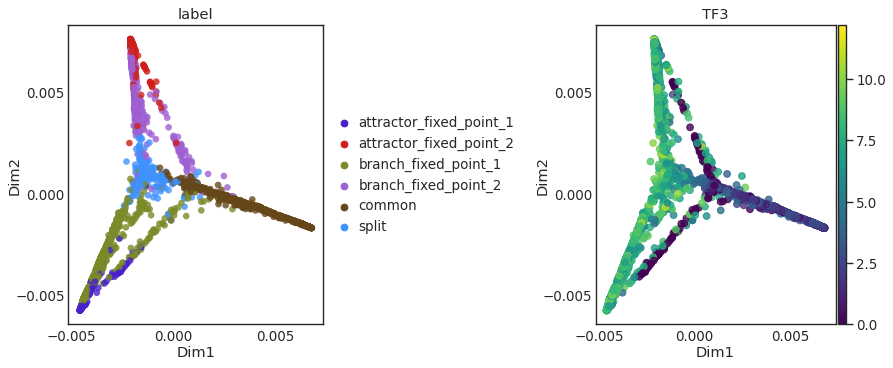

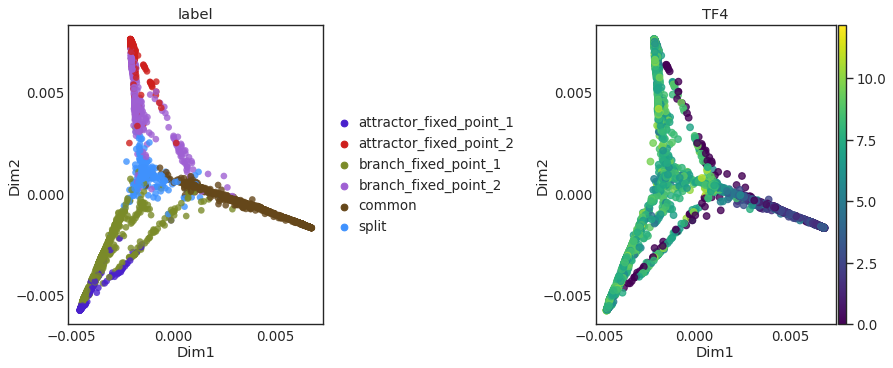

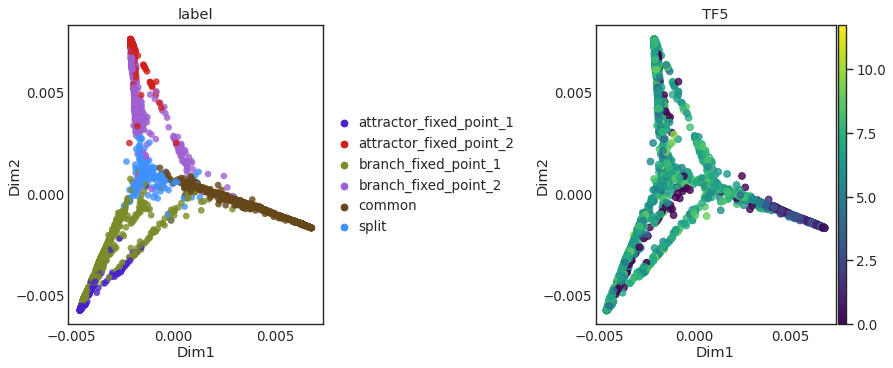

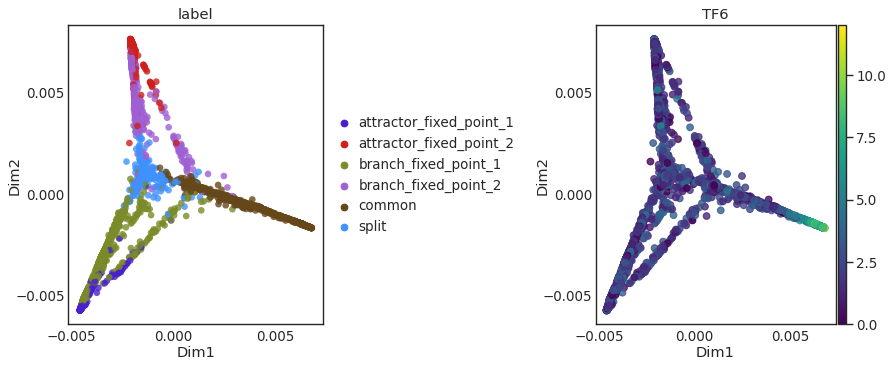

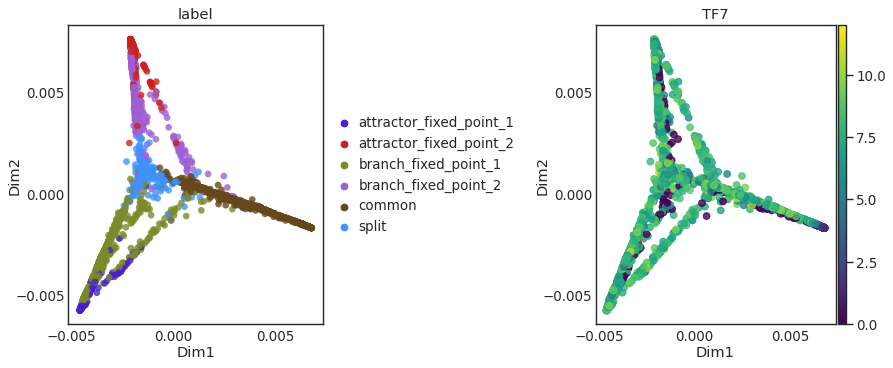

In [13]:
for gene in df.index:
    st.plot_dimension_reduction(adata,color=['label', gene],
                            n_components=2,show_graph=False,show_text=False)

In [14]:
#?st.seed_elastic_principal_graph

#### Trajectory inference

In [15]:
st.seed_elastic_principal_graph(adata,n_clusters=11)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 11
Calculatng minimum spanning tree...
Number of initial branches: 3


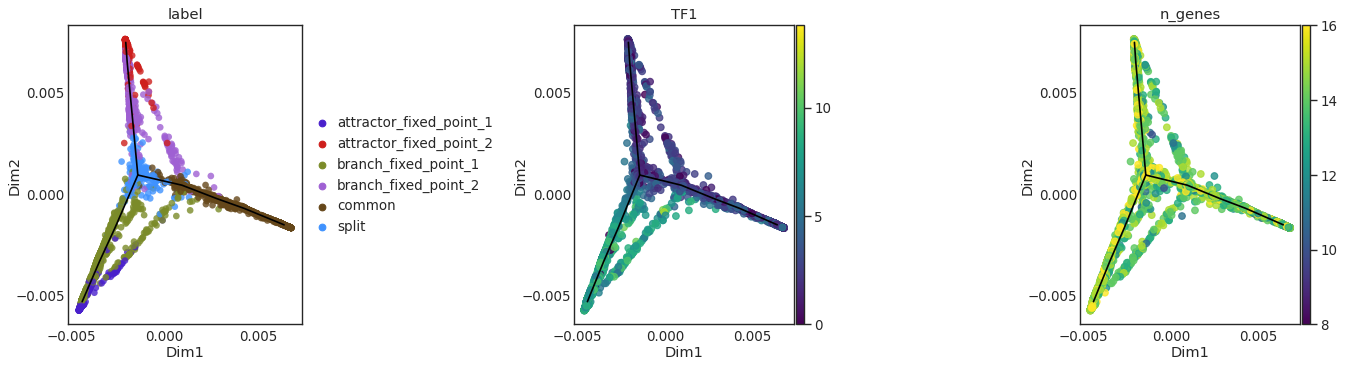

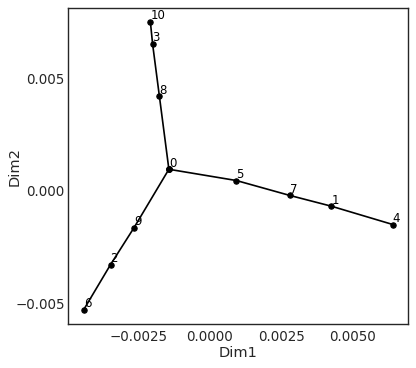

In [16]:
st.plot_dimension_reduction(adata,color=['label','TF1','n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=True)

**`epg_alpha`, `epg_mu`, `epg_lambda` are the three most influential parameters for learning elastic principal graph.**  
- `epg_alpha`: penalizes spurious branching events. **The larger, the fewer branches the function will learn**. (by default, `epg_alpha=0.02`)
- `epg_mu`: penalizes the deviation from harmonic embedding, where harmonicity assumes that each node is the mean of its neighbor nodes. **The larger, the more edges the function will use to fit into points(cells)** (by default, `epg_mu=0.1`) 
- `epg_lambda`: penalizes the total length of edges. **The larger, the 'shorter' curves the function will use to fit into points(cells)** and the fewer points(cells) the curves will reach. (by default, `epg_lambda=0.02`)

> **'epg_trimmingradius'** can help get rid of noisy points (by defalut `epg_trimmingradius=Inf`)   
e.g. `st.elastic_principal_graph(adata,epg_trimmingradius=0.1)`  

In [17]:
st.elastic_principal_graph(adata,epg_alpha=0.07,epg_mu=0.07,epg_lambda=0.03)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 5200 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||50
	
4.024e-07
	
50
	
49
	
46
	
1
	
0
	
0
	
9.588e-08
	
8.343e-08
	
0.9965
	
0.9969
	
2.869e-07
	
1.97e-08
	
9.848e-07
	
4.924e-05
	
0


23.646 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 3


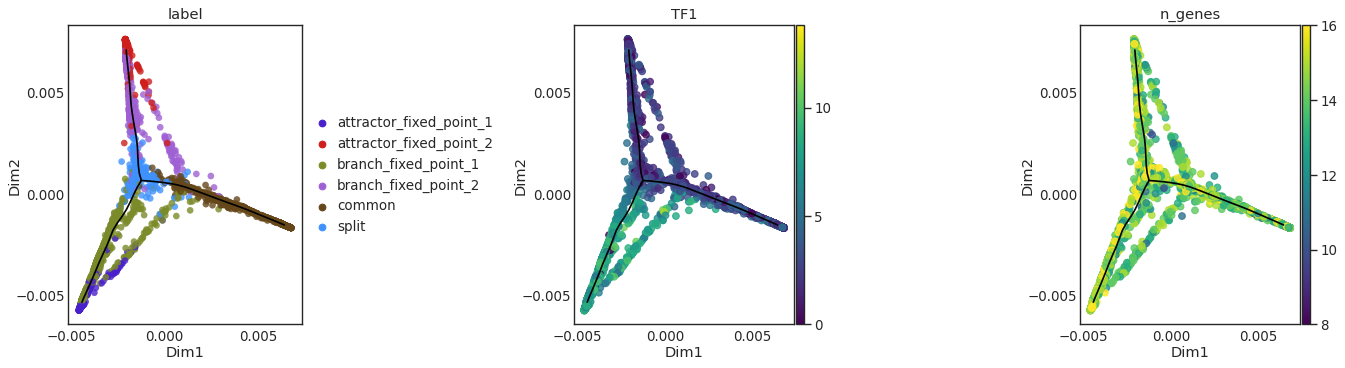

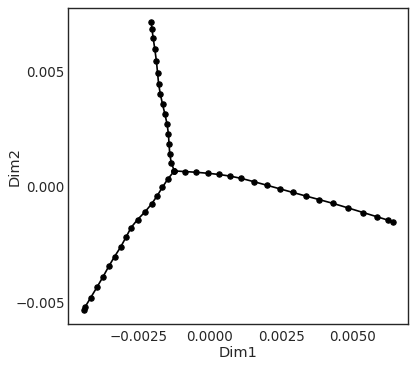

In [18]:
st.plot_dimension_reduction(adata,color=['label','TF1','n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)

#### Adjusting trajectories (optional)

* Finetune branching event:  
```python
st.optimize_branching(adata,incr_n_nodes=30)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```
* Prune trivial branches:  
```python
st.prune_elastic_principal_graph(adata,epg_collapse_mode='EdgesNumber',epg_collapse_par=2)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```

* Shift branching node:  
```python
st.shift_branching(adata,epg_shift_mode='NodeDensity',epg_shift_radius=0.1,epg_shift_max=3)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```

Extending leaves with additional nodes ...
Number of branches after extending leaves: 3


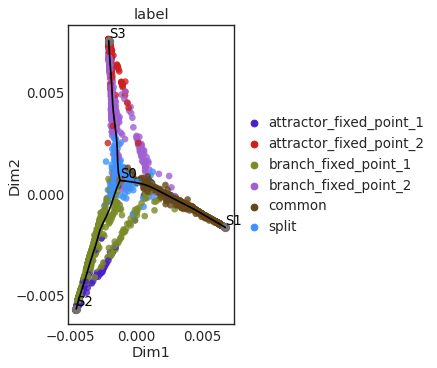

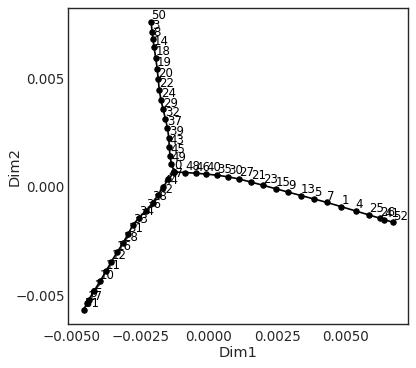

In [19]:
###Extend leaf branch to reach further cells 
st.extend_elastic_principal_graph(adata, epg_ext_mode='WeigthedCentroid',epg_ext_par=0.8)
st.plot_dimension_reduction(adata,color=['label'],n_components=2,show_graph=True,show_text=True)
st.plot_branches(adata,show_text=True)

#### Trajectory visualization

##### flat tree

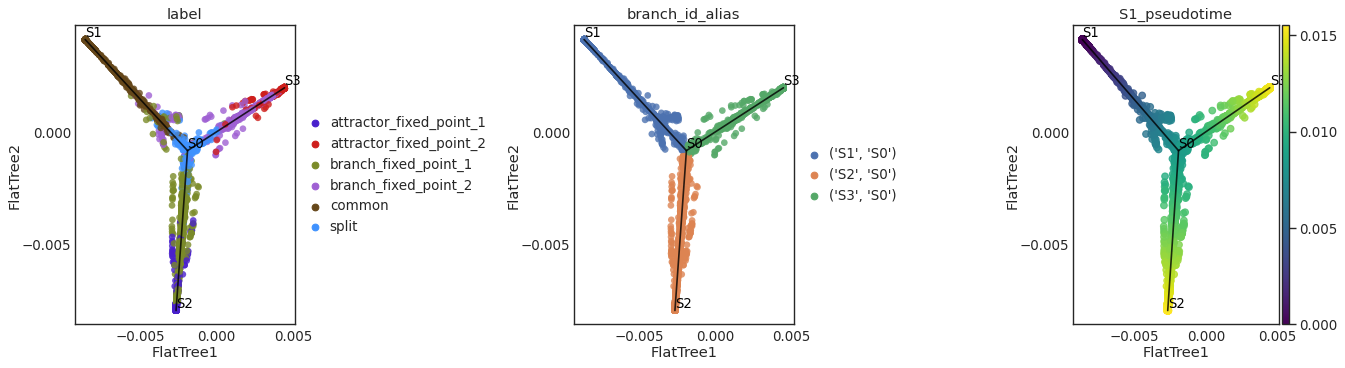

In [20]:
st.plot_flat_tree(adata,color=['label','branch_id_alias','S1_pseudotime'],
                  dist_scale=0.5,show_graph=True,show_text=True)

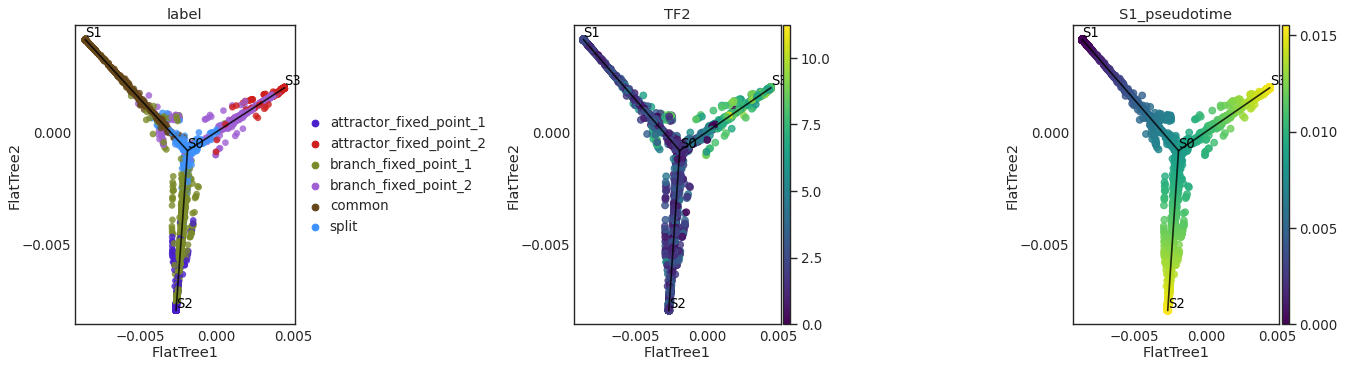

In [21]:
st.plot_flat_tree(adata,color=['label', 'TF2','S1_pseudotime'],
                  dist_scale=0.5,show_graph=True,show_text=True)

##### stream plot at single cell level

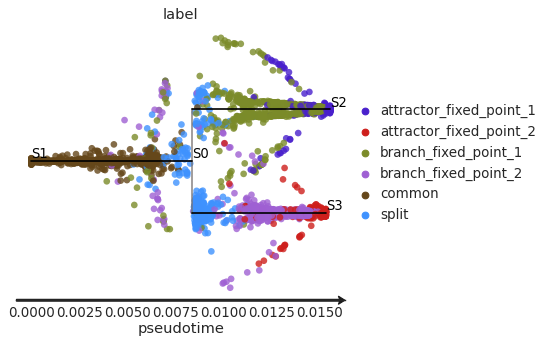

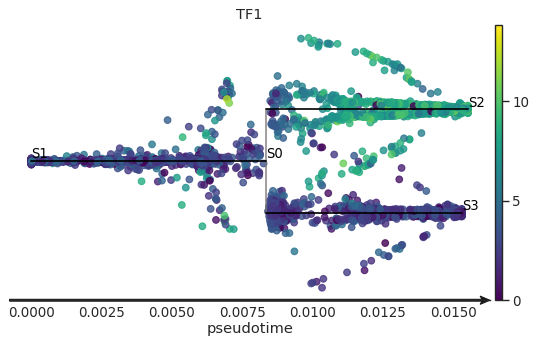

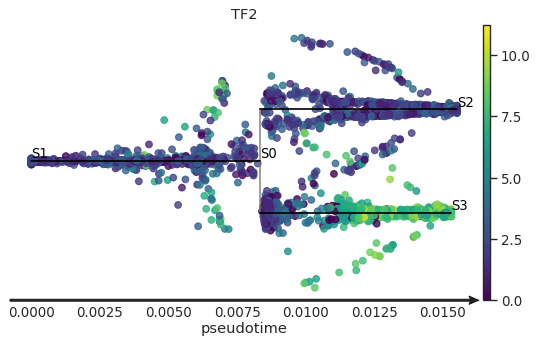

In [22]:
st.plot_stream_sc(adata,root='S1',color=['label','TF1', 'TF2'],
                  dist_scale=0.3,show_graph=True,show_text=True)

##### stream plots

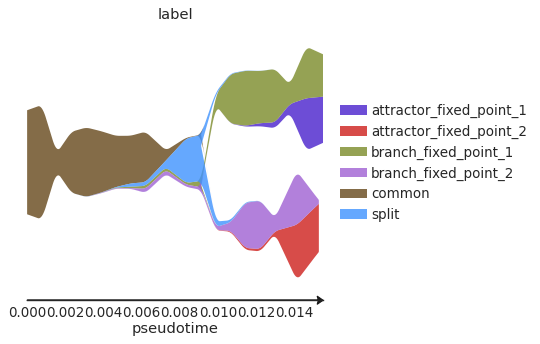

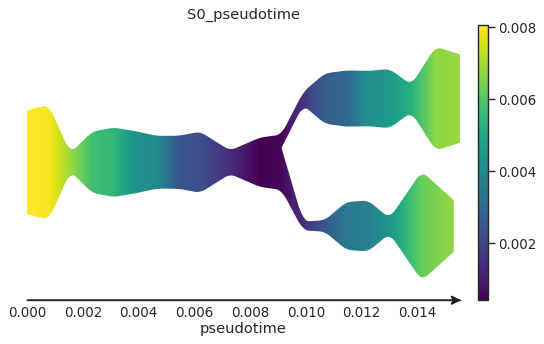

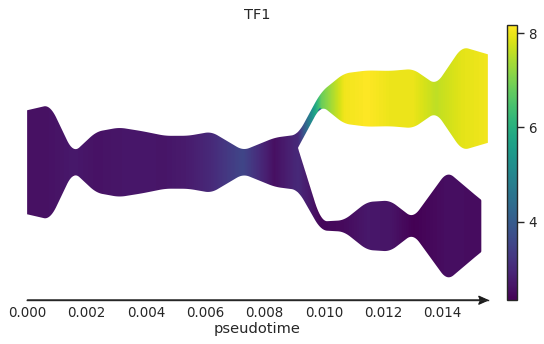

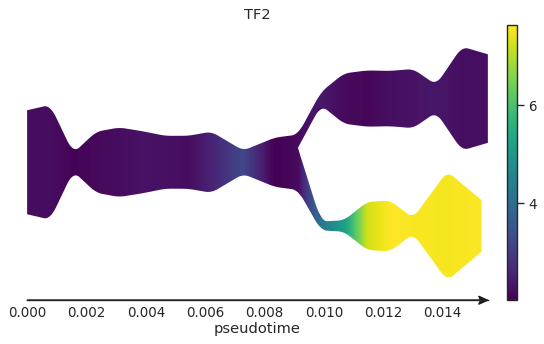

In [23]:
st.plot_stream(adata,root='S1',color=['label', 'S0_pseudotime', 'TF1', 'TF2'])

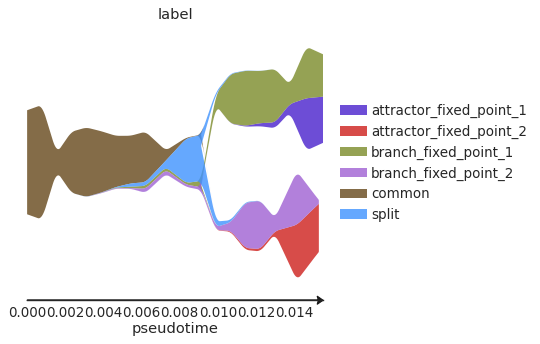

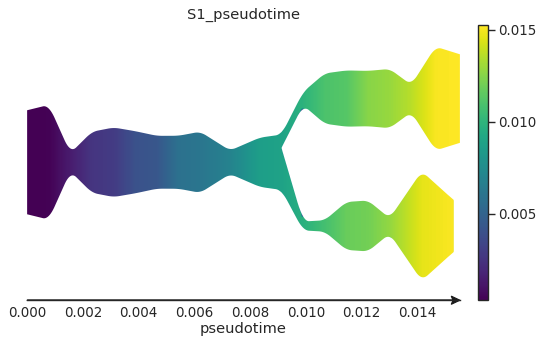

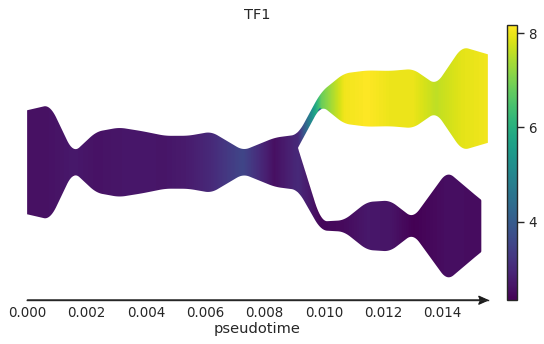

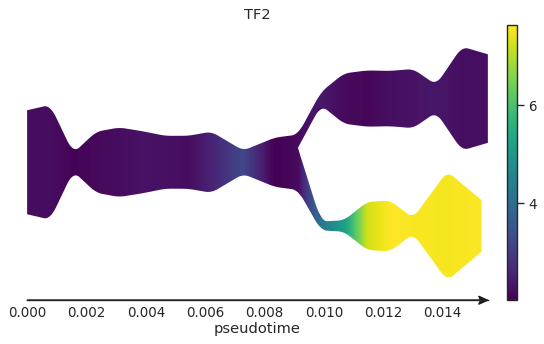

In [40]:
st.plot_stream(adata,root='S1',color=['label', 'S1_pseudotime', 'TF1', 'TF2'])

**Some useful parameters to finetune the appearance of stream plots:**
* `dist_scale`: controls the width of STREAM plot branches.
* `factor_num_win`: controls the resolution of STREAM plot.
* `preference`: controls the order of branches
* `log_scale`: shows stream plot in log scale to zoom in on thin branches

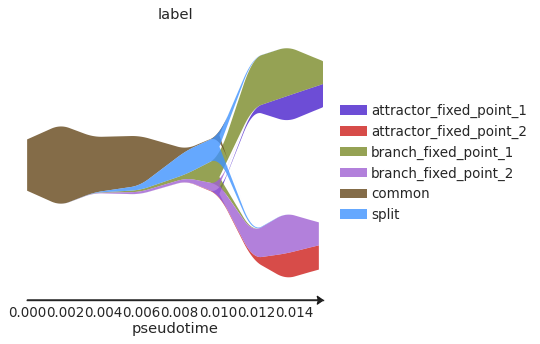

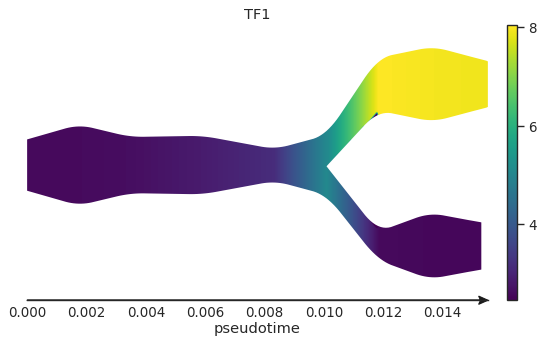

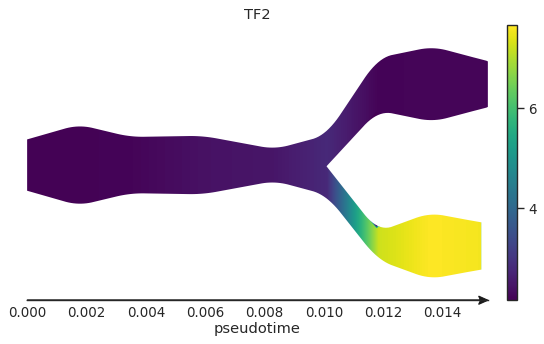

In [25]:
st.plot_stream(adata,root='S1',color=['label', 'TF1', 'TF2'],dist_scale=0.5,factor_num_win=1.5,preference=['S0'])

#### Marker genes detection

`marker_list` defines the list of genes to scan. If not specified, by default it uses all available genes. It might be time-consuming.  

Here we only include variable genes.

##### 1) detect marker genes for each leaf branch

In [26]:
st.detect_leaf_markers(adata,marker_list=adata.uns['var_genes'],cutoff_zscore=1.0,cutoff_pvalue=0.01,
                       root='S1',n_jobs=10)

Scanning the specified marker list ...
Filtering out markers that are expressed in less than 5 cells ...
10 cpus are being used ...
16 markers are being scanned ...


In [27]:
adata.uns['leaf_markers_all'].head()

,zscore,H_statistic,H_pvalue,S1S0_pvalue,S0S2_pvalue,S0S3_pvalue
G1,1.41421,1655.51,0,0,1,0
TF2,1.41408,1847.79,0,0,0,1
TF1,1.41349,3123.02,0,0,1,0
TF3,-1.41395,3273.24,0,1,0,0
TF4,-1.41421,2143.12,0,1,0,0


In [28]:
for _key in adata.uns['leaf_markers'].keys():
    print(_key)
    print(adata.uns['leaf_markers'][_key], end="\n\n")

('S1', 'S0')
      zscore H_statistic      H_pvalue S1S0_pvalue   S0S2_pvalue  S0S3_pvalue
TF3 -1.41395     3273.24             0           1             0            0
TF4 -1.41421     2143.12             0           1             0            0
TF5 -1.41391     1039.57  1.81738e-226           1  1.81114e-187  1.0957e-184
TF6  1.41388       505.6  1.62303e-110           1    1.0906e-91  1.65664e-77
TF7 -1.41421     178.692   1.57555e-39           1   2.04833e-32  1.03049e-26

('S0', 'S2')
      zscore H_statistic      H_pvalue   S1S0_pvalue S0S2_pvalue   S0S3_pvalue
G1   1.41421     1655.51             0             0           1             0
TF1  1.41349     3123.02             0             0           1             0
G2   1.41412     734.176  3.76541e-160  3.89949e-148           1  6.61798e-119
G3    1.4142     158.939   3.06763e-35   9.94999e-30           1   1.32778e-26

('S0', 'S3')
      zscore H_statistic      H_pvalue   S1S0_pvalue   S0S2_pvalue S0S3_pvalue
TF2  1.41408     

##### 2) detect transition genes for each branch

In [29]:
st.detect_transition_markers(adata,marker_list=adata.uns['var_genes'],cutoff_spearman=0.4,cutoff_logfc=0.25,
                             root='S1',n_jobs=4)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
16 markers are being scanned ...


In [30]:
for _key in adata.uns['transition_markers'].keys():
    print(f"Transition {_key}")
    print(adata.uns['transition_markers'][_key].head(), end="\n\n")

Transition ('S1', 'S0')
         stat     logfc           pval           qval
TF6 -0.715113  1.812976   0.000000e+00   0.000000e+00
TF5  0.691944  1.668766  2.007299e-303  6.021898e-303
TF4  0.508160  1.738548  3.161849e-140  6.323698e-140
TF7  0.463735  1.529833  4.815971e-114  7.223956e-114

Transition ('S0', 'S2')
        stat     logfc           pval           qval
G2  0.735933  1.556315  1.097693e-276  3.293080e-276
G1  0.642504  1.587627  1.580760e-189  2.371139e-189
G3  0.472232  1.547750   7.269385e-91   7.269385e-91

Transition ('S0', 'S3')
         stat     logfc           pval           qval
G4   0.750231  1.375914  4.216767e-262  1.265030e-261
TF2  0.556714  1.732005  1.244339e-118  1.866509e-118
G6   0.543581  1.583412  4.096427e-112  4.096427e-112



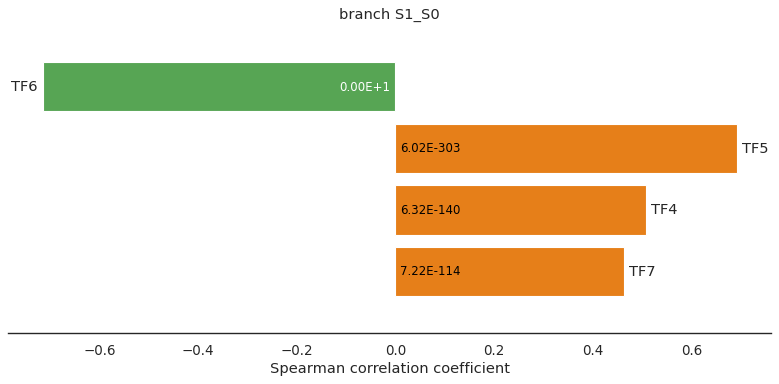

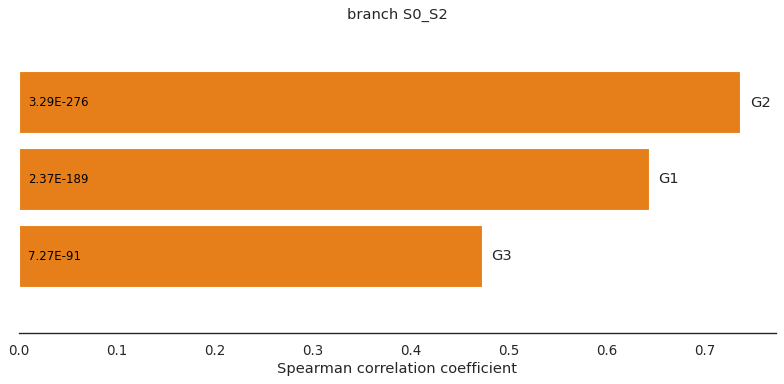

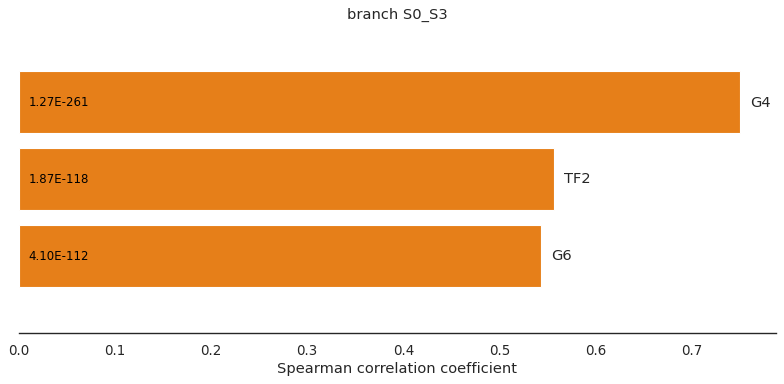

In [31]:
st.plot_transition_markers(adata,fig_size=(10,5))

##### 3) detect marker genes that are differentially expressed between pairs of branches

In [32]:
st.detect_de_markers(adata,marker_list=adata.uns['var_genes'],cutoff_zscore=1,cutoff_logfc=0.25,
                     root='S1',n_jobs=4)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
16 markers are being scanned ...


In [33]:
for _key in adata.uns['de_markers_greater'].keys():
    print(f"Differential expression between branches {_key[0]} and {_key[1]} are :")
    print(adata.uns["de_markers_greater"][_key], end="\n\n")

Differential expression between branches ('S1', 'S0') and ('S0', 'S2') are :
       z_score          U     logfc   mean_up  mean_down          pval  \
TF6  19.601187  2371608.5  0.968267  0.485255   0.247786  1.511027e-85   

             qval  
TF6  1.726888e-85  

Differential expression between branches ('S1', 'S0') and ('S0', 'S3') are :
       z_score          U     logfc   mean_up  mean_down          pval  \
TF6  18.188895  2093659.5  0.934712  0.485255   0.253628  6.322016e-74   

             qval  
TF6  7.375686e-74  

Differential expression between branches ('S0', 'S2') and ('S0', 'S3') are :
       z_score          U     logfc   mean_up  mean_down           pval  \
TF1  46.681443  2318480.5  1.601834  0.834991   0.274534   0.000000e+00   
G1   33.633562  1998668.0  1.247516  0.706433   0.297121  5.426784e-248   
G2   22.214201  1718784.5  0.919712  0.597609   0.315623  2.505098e-109   
G3   10.573828  1433486.5  0.522324  0.471992   0.328480   3.941596e-26   

             

In [34]:
for _key in adata.uns['de_markers_less'].keys():
    print(f"Differential expression between branches {_key[0]} and {_key[1]} are :")
    print(adata.uns["de_markers_less"][_key], end="\n\n")

Differential expression between branches ('S1', 'S0') and ('S0', 'S2') are :
       z_score          U     logfc   mean_up  mean_down           pval  \
TF1 -50.376219    71776.0  1.498795  0.294920   0.834991   0.000000e+00   
TF3 -48.101254   146433.5  1.760396  0.234545   0.796521   0.000000e+00   
TF4 -39.482501   429660.5  1.141071  0.363273   0.802148   0.000000e+00   
G1  -37.002569   511317.5  1.251407  0.296319   0.706433  1.041810e-299   
TF5 -27.275735   830928.0  0.721550  0.456169   0.752689  8.234801e-164   
G2  -24.768239   913401.5  0.937211  0.311811   0.597609  1.972987e-135   
G3  -11.345920  1354541.0  0.519020  0.329235   0.471992   7.771828e-30   

              qval  
TF1   0.000000e+00  
TF3   0.000000e+00  
TF4   0.000000e+00  
G1   2.083620e-299  
TF5  1.317568e-163  
G2   2.630650e-135  
G3    7.771828e-30  

Differential expression between branches ('S1', 'S0') and ('S0', 'S3') are :
       z_score          U     logfc   mean_up  mean_down           pval  \
T

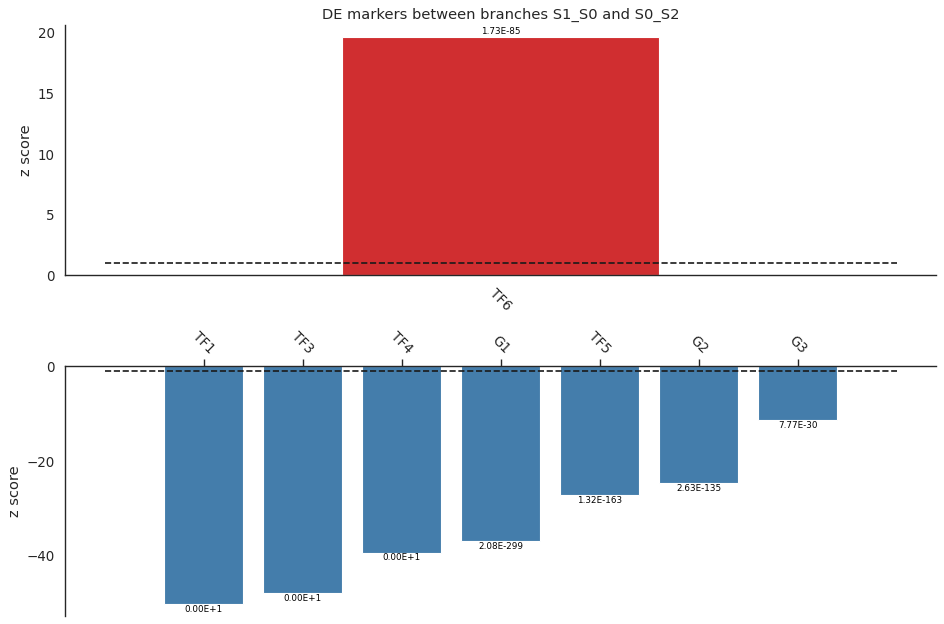

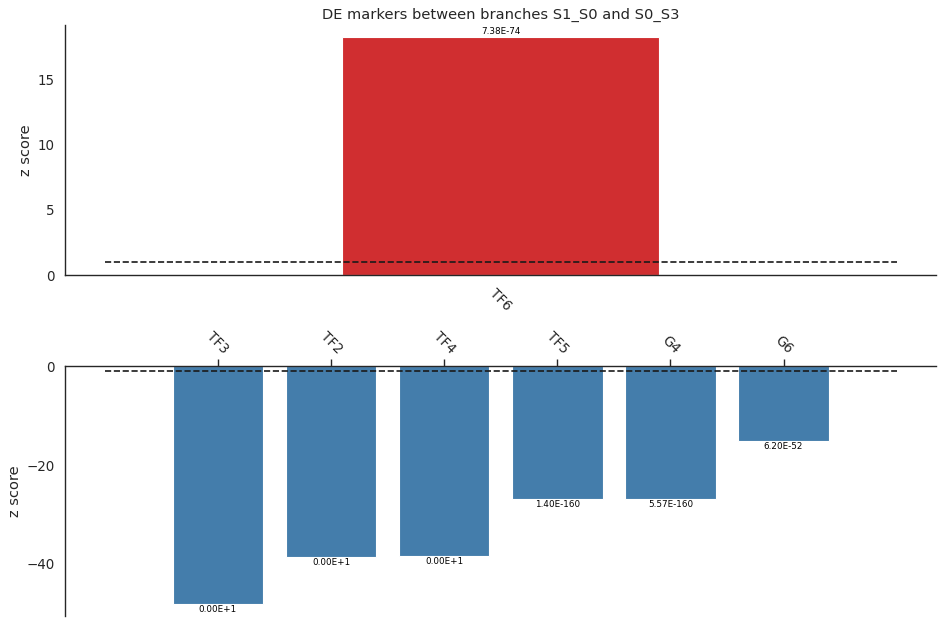

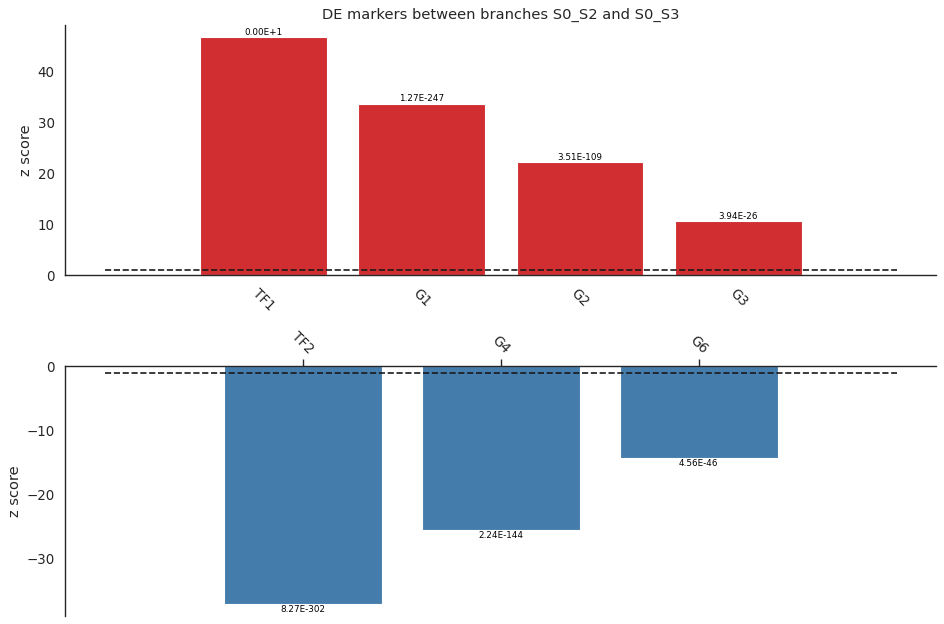

In [35]:
st.plot_de_markers(adata)

##### 4) detect cell population-specific markers

```python
st.detect_markers(adata,ident='label',marker_list=adata.uns['var_genes'],cutoff_zscore=1.0,cutoff_pvalue=0.01)
```

In [36]:
st.detect_markers(
    adata,
    ident='label',
    marker_list=adata.uns['var_genes'],
    cutoff_zscore=1.0,
    cutoff_pvalue=0.01
)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
16 markers are being scanned ...


In [37]:
adata.uns["markers_label"].keys()

dict_keys(['attractor_fixed_point_1', 'attractor_fixed_point_2', 'branch_fixed_point_1', 'branch_fixed_point_2', 'common', 'split'])

In [38]:
for key in adata.uns["markers_label"].keys():
    print(f"Detected population-specific markers for `{key}`")
    print(f"\t{adata.uns['markers_label'][key].index.to_list()}")

Detected population-specific markers for `attractor_fixed_point_1`
	['G1', 'G2', 'G3']
Detected population-specific markers for `attractor_fixed_point_2`
	['G4', 'G6']
Detected population-specific markers for `branch_fixed_point_1`
	[]
Detected population-specific markers for `branch_fixed_point_2`
	[]
Detected population-specific markers for `common`
	['TF3', 'TF4', 'TF5', 'TF6', 'TF7']
Detected population-specific markers for `split`
	[]


#### Save results

In [39]:
st.write(adata,file_name='stream_bifurcation_core_regulation2.pkl')

To read back the saved `.pkl` file
```python
adata = st.read('./stream_result/stream_result.pkl')
```